# SULEIMAN BASHIR SHAMSUDEEN-AI FOR CITIES SUBMISSION


## Titanic Survival Prediction- using Datasist 

install datasist

```
pip install datasist

```

[Documentation](https://risingodegua.gitbook.io/datasist-doc/)

[Contributors are needed!](https://risingodegua.gitbook.io/datasist-doc/contributing)

In [1]:
!pip install datasist

In [0]:
#importing libraries
import datasist as ds #it makes you smile
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [0]:
#importing csv files
df_train = pd.read_csv('/content/drive/My Drive/Colab_Datasets/train.csv')
df_test =  pd.read_csv('/content/drive/My Drive/Colab_Datasets/test.csv')

#Saving test IDs for submission
test_id = df_test['traveller_ID']

# Understanding Titanic dataset Through Exploratory Data Analysis

In [6]:
ds.structdata.describe(df_train)

First five data points


,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0




Random five data points


,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
249,144,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C,5,1
294,408,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.5000,NaN,S,NaN,0
644,1284,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S,NaN,0
582,341,2,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0000,F4,S,13,1
723,488,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,NaN,S,NaN,0




Last five data points


,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
911,1095,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,0
912,1130,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S,NaN,0
913,1294,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,NaN,0
914,860,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1
915,1126,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S,NaN,0




Shape of  data set: (916, 13)


Size of  data set: 11908


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
traveller_ID,int64
ticket_class,int64
name,object
sex,object
age,float64
Siblings_spouses,int64
Parchil,int64
TickNum,object
fare,float64
cabin,object




Numerical Features in Data set
['traveller_ID', 'ticket_class', 'age', 'Siblings_spouses', 'Parchil', 'fare', 'Survived']


Categorical Features in Data set


['name', 'sex', 'TickNum', 'cabin', 'embarked', 'MedBoat']



Statistical Description of Columns


,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000




Description of Categorical Features


,count,unique,top,freq
name,916,915,"Connolly, Miss. Kate",2
sex,916,2,male,592
TickNum,916,694,CA. 2343,9
cabin,204,146,B57 B59 B63 B66,5
embarked,915,3,S,638
MedBoat,327,24,13,30




Unique class Count of Categorical features


,Feature,Unique Count
0,name,915
1,sex,2
2,TickNum,694
3,cabin,147
4,embarked,4
5,MedBoat,25




Missing Values in Data


,features,missing_counts,missing_percent
0,traveller_ID,0,0.0
1,ticket_class,0,0.0
2,name,0,0.0
3,sex,0,0.0
4,age,187,20.4
5,Siblings_spouses,0,0.0
6,Parchil,0,0.0
7,TickNum,0,0.0
8,fare,1,0.1
9,cabin,712,77.7


There are 916 training rows and 393 test rows.
There are 13 training columns and 12 test columns.
Id field is not unique
Train and test sets IDs are the same.




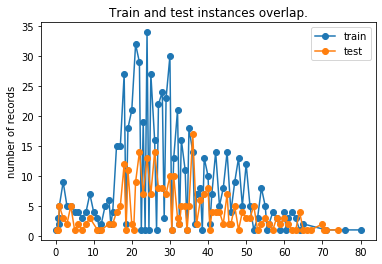

In [7]:
#check train and test distribution
ds.structdata.check_train_test_set(df_train, df_test,'name', 'age')

##### We are going to explore train dataset ,then we'll try to concatenate train and test dataset to deal with missing values

In [0]:
ylabel = df_train.Survived
train = df_train.drop(columns=['Survived'])

all_data, ntrain, ntest = ds.structdata.join_train_and_test(train, df_test)

In [9]:
all_data.shape

(1309, 12)

In [10]:
#check missing values
ds.structdata.display_missing(all_data)

,features,missing_counts,missing_percent
0,traveller_ID,0,0.0
1,ticket_class,0,0.0
2,name,0,0.0
3,sex,0,0.0
4,age,263,20.1
5,Siblings_spouses,0,0.0
6,Parchil,0,0.0
7,TickNum,0,0.0
8,fare,1,0.1
9,cabin,1014,77.5


From the table above we can see that the cabin variable and medboat has more than 60%  missing data in both Test and train data the highest amount of missing data.this is an indication that there are variables that may not be of importance or as informative for running a predictive modelling therefore we will drop the Cabin and medboat variables.

In [0]:
#dropping the cabin variable
drop_column = ['cabin']
df_train.drop(drop_column, axis=1, inplace = True)
df_test.drop(drop_column,axis=1,inplace=True)

In [0]:
#dropping the medboat variable
drop_column2 = ['MedBoat']
df_train.drop(drop_column2, axis=1, inplace = True)
df_test.drop(drop_column2,axis=1,inplace=True)

In [14]:
df_train

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,S,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,0
...,...,...,...,...,...,...,...,...,...,...,...
911,1095,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,Q,0
912,1130,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,S,0
913,1294,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,S,0
914,860,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


In [0]:
#fill categorical dataset
all_data = ds.feature_engineering.fill_missing_cats(all_data)
all_data = ds.feature_engineering.fill_missing_num(all_data)

In [30]:
#check missing values
ds.structdata.display_missing(df_train)

,features,missing_counts,missing_percent
0,traveller_ID,0,0.0
1,ticket_class,0,0.0
2,name,0,0.0
3,sex,0,0.0
4,age,0,0.0
5,Siblings_spouses,0,0.0
6,Parchil,0,0.0
7,TickNum,0,0.0
8,fare,0,0.0
9,embarked,1,0.1


The age Variable still contains missing values therefore we will fill this variable with dummy variables 

In [0]:
#fill numerical variables in the train and test set dataset
df_train = ds.feature_engineering.fill_missing_num(df_train)
df_test = ds.feature_engineering.fill_missing_num(df_test)

In [19]:
#check missing values
ds.structdata.display_missing(df_train)

,features,missing_counts,missing_percent
0,traveller_ID,0,0.0
1,ticket_class,0,0.0
2,name,0,0.0
3,sex,0,0.0
4,age,0,0.0
5,Siblings_spouses,0,0.0
6,Parchil,0,0.0
7,TickNum,0,0.0
8,fare,0,0.0
9,embarked,1,0.1


# Data visualization


##### Visualizing numerical features:

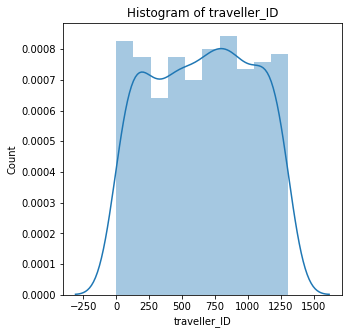

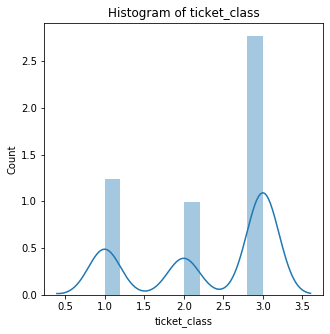

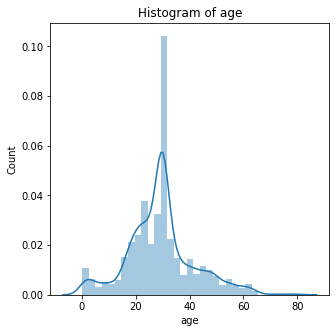

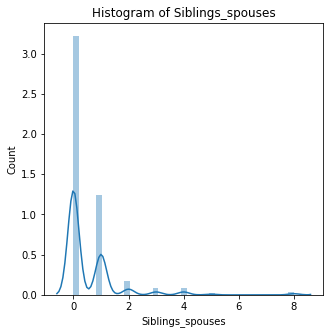

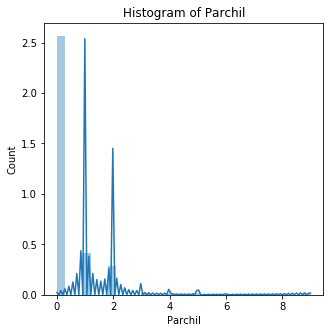

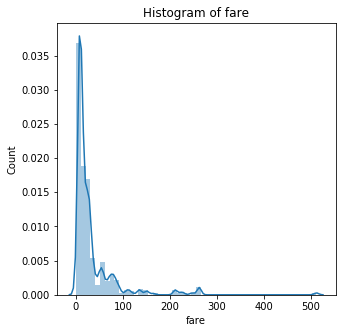

In [20]:
ds.visualizations.histogram(all_data[:ntrain])

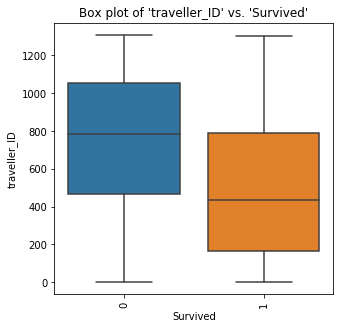

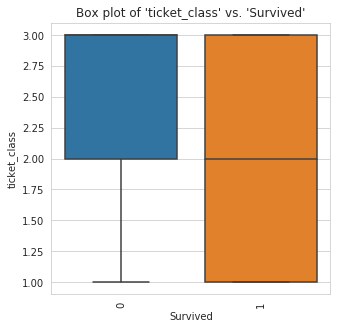

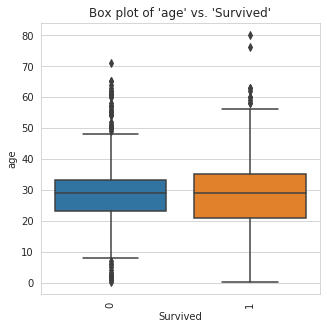

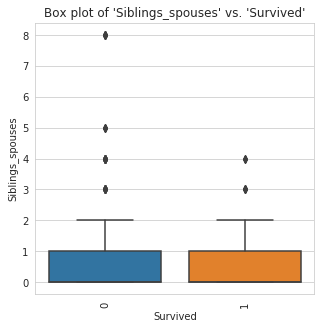

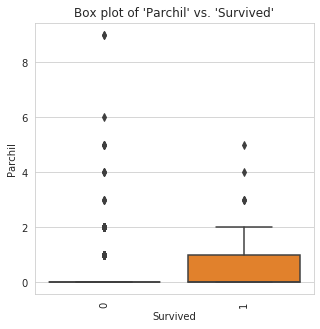

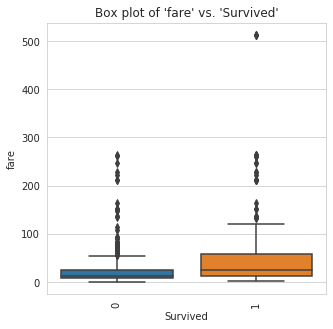

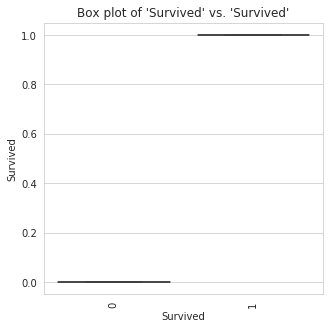

In [21]:
ds.visualizations.boxplot(df_train, target='Survived')

name feature has too many categories and will not be ploted
TickNum feature has too many categories and will not be ploted


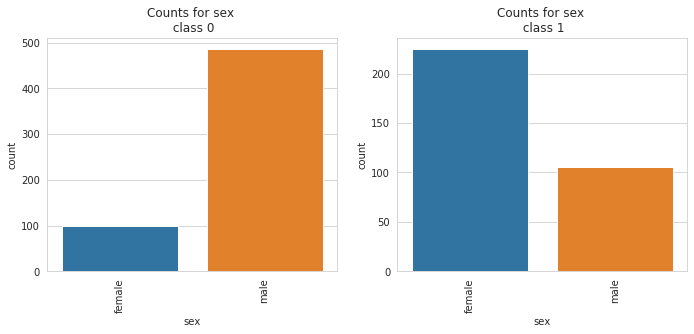

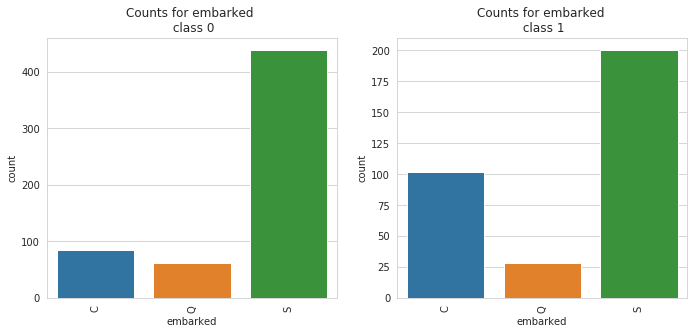

In [22]:
ds.visualizations.catbox(df_train, target='Survived')

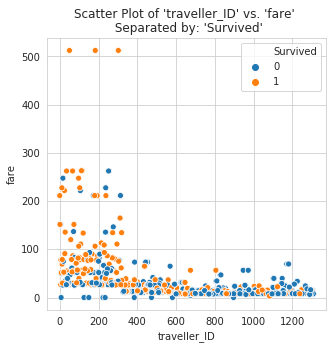

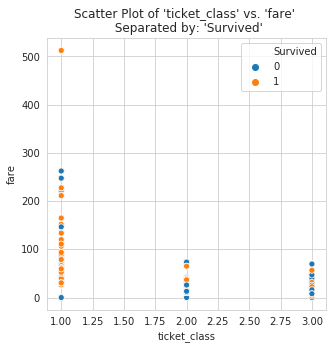

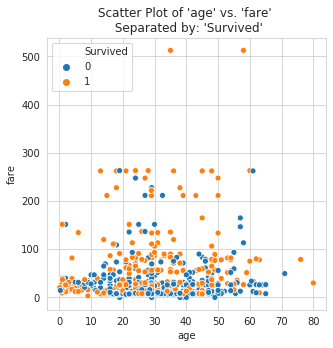

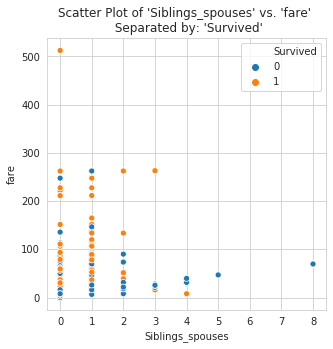

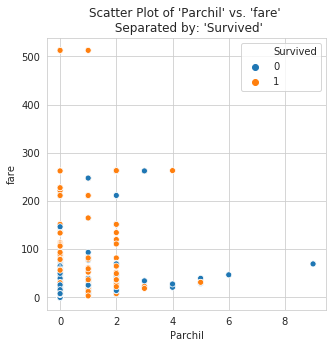

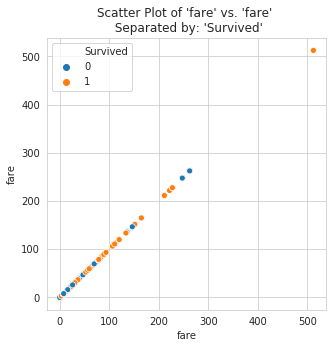

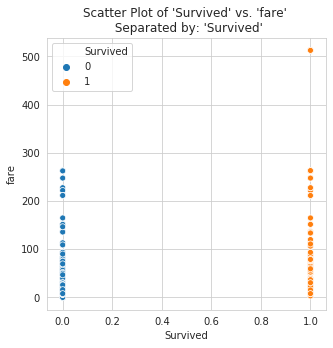

In [24]:
ds.visualizations.scatterplot(df_train, target='fare', separate_by='Survived')

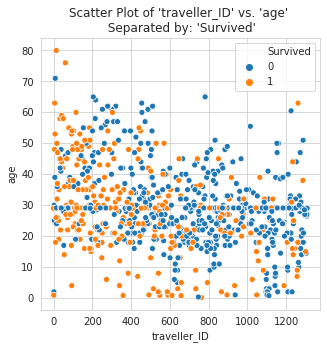

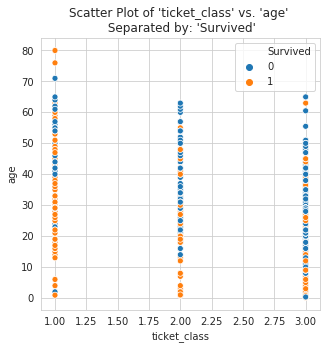

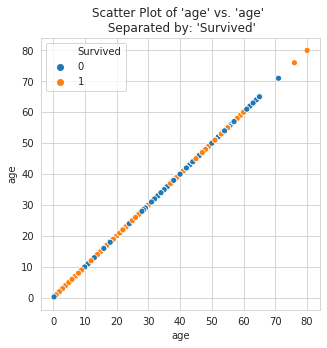

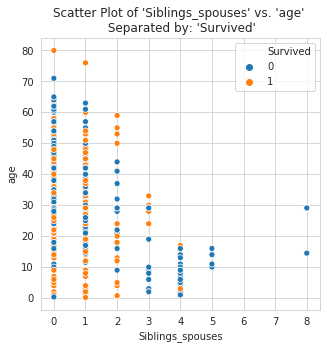

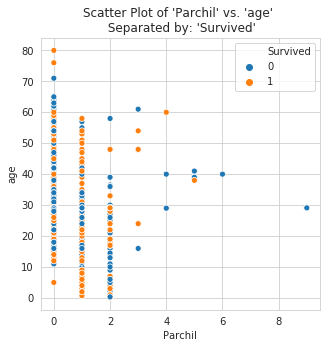

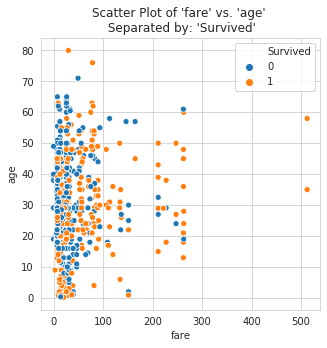

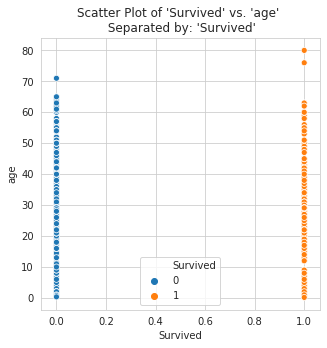

In [25]:
ds.visualizations.scatterplot(df_train, target='age', separate_by='Survived')

## Encoding Categorical Features 

In [0]:
#drop Name and travellerId
all_data.drop(columns=['traveller_ID', 'name'], inplace=True)

In [28]:
!pip install category-encoders

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
label_enc = ['TickNum', 'embarked']

import category_encoders as ce

enc = ce.OrdinalEncoder()
all_data = enc.fit_transform(all_data)
df_train = enc.fit_transform(df_train)

In [35]:
all_data.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,3.0,1,29.881135,0.0,0.0,1,8.6625,1,1,1
1,3.0,1,26.000000,0.0,0.0,2,7.8958,1,1,1
2,2.0,2,19.000000,0.0,0.0,3,26.0000,1,1,2
3,3.0,2,29.881135,8.0,2.0,4,69.5500,1,1,1
4,3.0,2,28.000000,0.0,0.0,5,7.7750,1,1,1


In [36]:
df_train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,29.102309,0,0,315037,8.6625,S,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.000000,0,0,349224,7.8958,S,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.0000,S,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.102309,8,2,CA. 2343,69.5500,S,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,347086,7.7750,S,0


In [37]:
#split new train and test
train = all_data[:ntrain]
test = all_data[ntrain:]

print(f"Shape of train {train.shape}")
print(f"Shape of test {test.shape}")

Shape of train (916, 10)
Shape of test (393, 10)


# Train test split

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Split
x_train,x_val,y_train,y_val = train_test_split(train,ylabel,test_size=.3,random_state=101)

In [0]:
#compare models
knn = KNeighborsClassifier(n_neighbors=15)
tree_gini = DecisionTreeClassifier(criterion = 'gini')
svm_lin = SVC(kernel = 'linear')
logr = LogisticRegression(C=100)
rf = RandomForestClassifier(max_depth=4, n_estimators=100)

models = [knn,tree_gini,svm_lin,logr,rf]

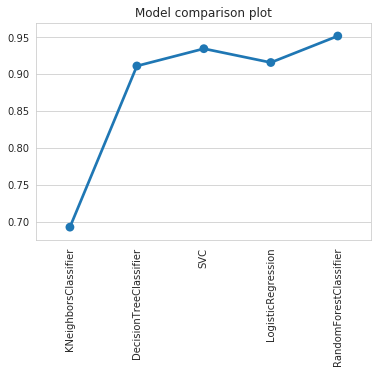

In [40]:
fitted_models, scores = ds.model.compare_model(models, x_train,y_train, scoring_cv=5)

Accuracy is  93.0
F1 score is  90.0
Precision is  98.0
Recall is  83.0
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive       175                 2
Actual negative        17                81



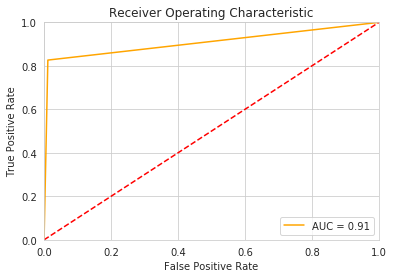

In [41]:
best_model = fitted_models[4]
pred = best_model.predict(x_val)

ds.model.get_classification_report(y_val, pred)

In [52]:
#predict on test set
final_pred = best_model.predict(df_test)
final_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [51]:
df_test

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked
0,1148,3.0,1,1,35.000000,0.0,0.0,1,7.1250,1
1,1049,3.0,2,1,20.000000,1.0,1.0,2,15.7417,2
2,982,3.0,3,1,31.672187,0.0,0.0,3,7.8958,1
3,808,3.0,4,1,31.672187,0.0,0.0,4,8.0500,1
4,1195,3.0,5,1,31.672187,0.0,0.0,5,7.7500,3
...,...,...,...,...,...,...,...,...,...,...
388,325,2.0,389,1,30.000000,0.0,0.0,341,13.0000,1
389,919,3.0,390,1,18.500000,0.0,0.0,342,7.2292,2
390,532,2.0,391,1,41.000000,0.0,0.0,343,13.0000,1
391,1159,3.0,392,2,31.672187,0.0,0.0,344,8.0500,1


In [0]:
label_enc = ['TickNum', 'embarked']

import category_encoders as ce

enc = ce.OrdinalEncoder()
df_test = enc.fit_transform(df_test)

In [0]:
sample = pd.read_csv('/content/drive/My Drive/Colab_Datasets/sample_submission.csv')


In [55]:
sample.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,1


In [0]:
sample['Survived'] = final_pred

In [0]:
sample.to_csv("Submission.csv", index=False)